<h1>Sieci neuronowe - ćwiczenie 1</h1>

<p>Potrzebne instalacje oraz import'y</p>

In [1]:
!pip install ucimlrepo


[notice] A new release of pip available: 22.2.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Wczytanie danych https://archive.ics.uci.edu/dataset/45/heart+disease

In [3]:
# original code from https://archive.ics.uci.edu/dataset/45/heart+disease
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
heart_data = heart_disease.data.original


In [4]:
heart_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
261,58,0,2,136,319,1,2,152,0,0.0,1,2.0,3.0,3
169,45,0,2,112,160,0,0,138,0,0.0,2,0.0,3.0,0
40,65,0,4,150,225,0,2,114,0,1.0,2,3.0,7.0,4
241,41,0,2,126,306,0,0,163,0,0.0,1,0.0,3.0,0
12,56,1,3,130,256,1,2,142,1,0.6,2,1.0,6.0,2
259,57,1,2,124,261,0,0,141,0,0.3,1,0.0,7.0,1
201,64,0,4,180,325,0,0,154,1,0.0,1,0.0,3.0,0
246,58,1,4,100,234,0,0,156,0,0.1,1,1.0,7.0,2
99,48,1,4,122,222,0,2,186,0,0.0,1,0.0,3.0,0
255,42,0,3,120,209,0,0,173,0,0.0,2,0.0,3.0,0


<h3>Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?</h3>

In [5]:
heart_data.shape

(303, 14)

Posiadamy 303 próbki w pobranych danych

In [6]:
heart_data["num"].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Wyniki wskazują na brak zbalansowania danych pod względem liczby próbek na klasy. 164 próbki (około 54%) są próbkami zdrowych pacjentów (bez wykazanych problemów z sercem). Natomiast osób z zdiagnozowanymi najpoważniejszymi chorobami serca (klasa 4) jest tylko 4%

<h3>Jakie są średnie i odchylenia cech liczbowych?</h3>

In [7]:
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"] # numeric features' labels from dataset

In [8]:
heart_data[num_features].mean()

age          54.438944
trestbps    131.689769
chol        246.693069
thalach     149.607261
oldpeak       1.039604
ca            0.672241
dtype: float64

In [9]:
heart_data[num_features].std()

age          9.038662
trestbps    17.599748
chol        51.776918
thalach     22.875003
oldpeak      1.161075
ca           0.937438
dtype: float64

Powyższe wyniki pokazują średnie wartości cech liczbowych oraz ich odchylenia standardowe. Dla przykładu średnia wartość wieku w zbiorze danych wynosi 54 lata, a około 70% danych mieści się między wiekiem 45, a 63.

<h3>Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?</h3>

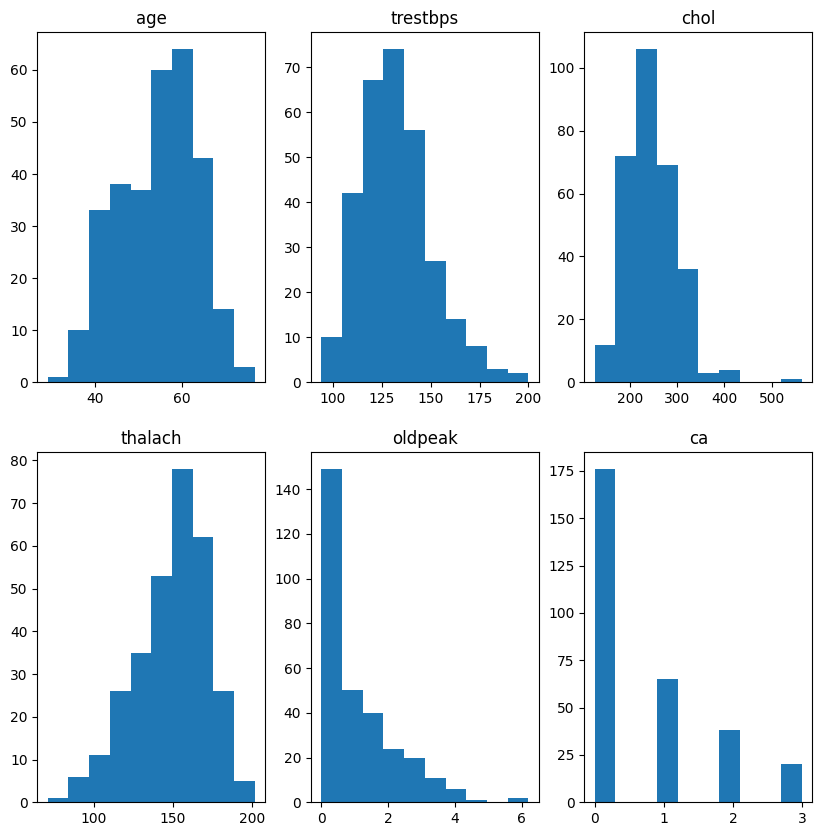

In [10]:
_, ax = plt.subplots(2,3, figsize=(10, 10))
for feature, subplt in zip(num_features, ax.flatten()):
    subplt.hist(heart_data[feature])
    subplt.set_title(feature)


Na powyższych histogramach cech liczbowych widać, że cechy wieku, ciśnienia krwi w spoczynku, poziomu cholesterolu oraz maksymalnego osiągniętego tętna układają się w przyblieniu zgodnie z wykresem Gaussa, zatem posiadają one rozkłady normalne. Dane depresji odcinka ST (oldpeak) oraz liczba naczyń zaobserwowanych poprzez fluoroskopię (ca) nie wykazują rozkładu normalnego, bardziej rozkład wykładniczy.

<h3>Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?</h3>

In [11]:
ctg_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"] #categorical features' labels from dataset

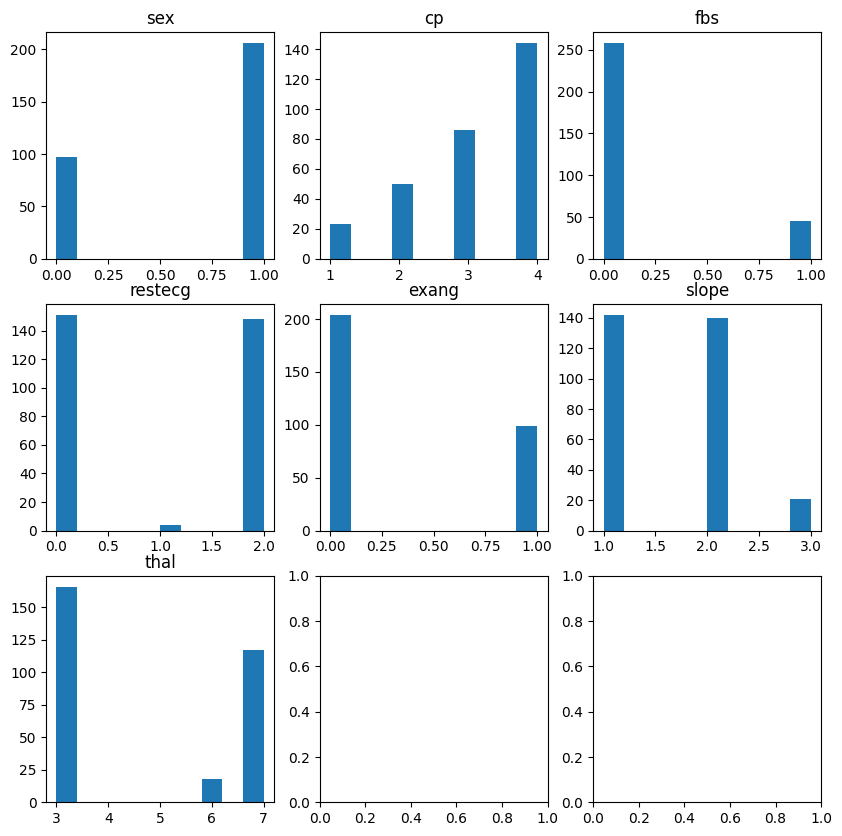

In [12]:
_, ax = plt.subplots(3,3, figsize=(10, 10))
for feature, subplt in zip(ctg_features, ax.flatten()):
    subplt.hist(heart_data[feature])
    subplt.set_title(feature)

Na powyższych histogramach cech kategorycznych nie widać, aby jakakolwiek cecha miała zrównoważone dane. Najbliżej jednak takiego rozkładu równomiernego są cechy danych elektrokardiograficznych (restecg) oraz nachylenie odcinka ST (slope). Z danych nierównomiernych widać np. że większą ilością badanych byli mężczyźni.

<h3>Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je zastąpić?</h3>

In [13]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [14]:
heart_data[heart_data["ca"].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [15]:
heart_data[heart_data["thal"].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2


Z powyższych wyników widzimy, że dane posiadają łącznie 6 wartości pustych (cecha liczby naczyń zaobserwowanych poprzez fluoroskopię (ca) posiada ich 4, a cecha rodzaju defektu (thal) posiada ich 2). 
Jest wiele sposobów na rozwiązanie tego problemu np. uzupełnienie brakujących danych w sposób sztuczny używając mediany, albo algorytmu k-najbliższych sąsiadów. Natomiast z powodu małej ilości danych brakujących (około 2% danych), możemy najprościej usunąć te dane ze zbioru.

<h3>Dodadkowe analizy</h3>

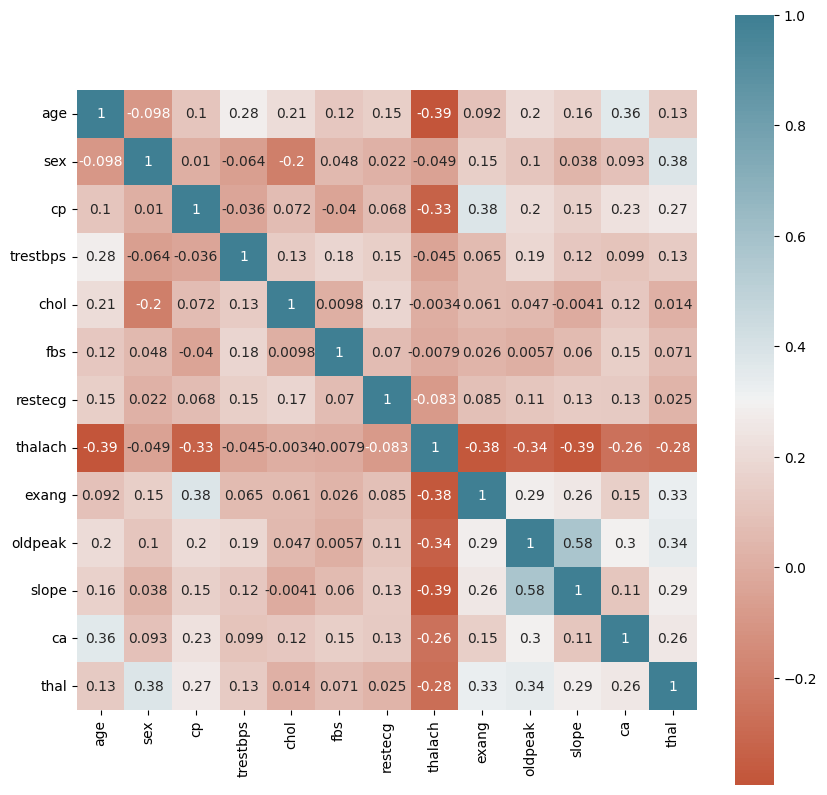

In [16]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(heart_data.loc[:, heart_data.columns != "num"].corr(), cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True) #heatmap of correlation of all features from dataset
plt.show()

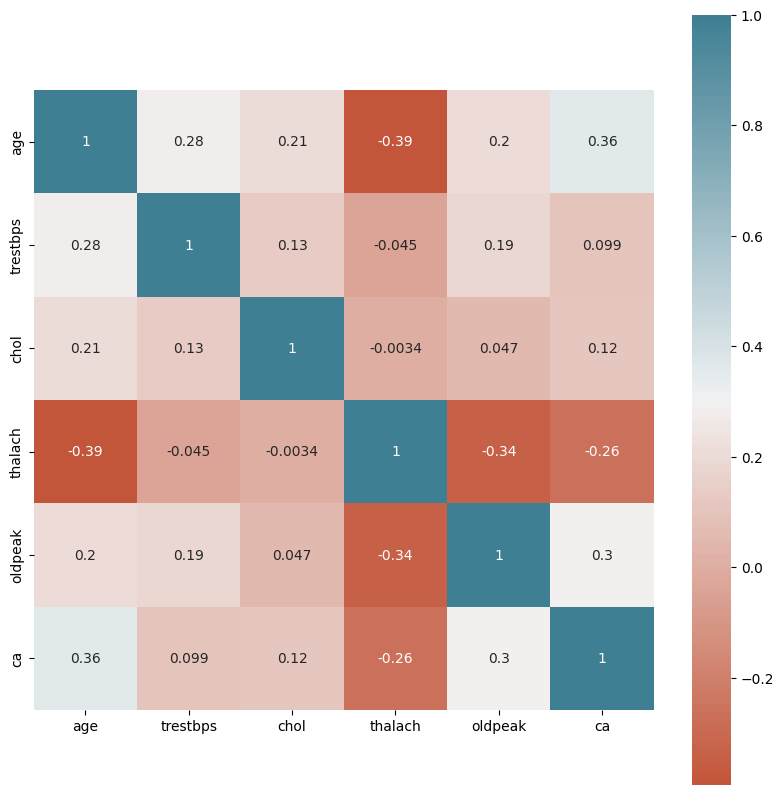

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data[num_features].corr(), cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True) #heatmap of correlation of numerical features from dataset
plt.show()



Mapy ciepła zamieszczone powyżej pokazują poziom korelacji cech danych. Przy wysokich wartościach korelacji możnaby rozważyć usunięcie jednej z tych cech np. (slope i oldpeak), mogłoby to pomóc w uzykaniu lepszych wyników nauczania. Warto jednak rozważyć także sens merytoryczny tych dwóch cech, czy jednak nie są one znaczące dla całego modelu.

age            Axes(0.125,0.653529;0.227941x0.226471)
trestbps    Axes(0.398529,0.653529;0.227941x0.226471)
chol        Axes(0.672059,0.653529;0.227941x0.226471)
thalach        Axes(0.125,0.381765;0.227941x0.226471)
oldpeak     Axes(0.398529,0.381765;0.227941x0.226471)
ca          Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

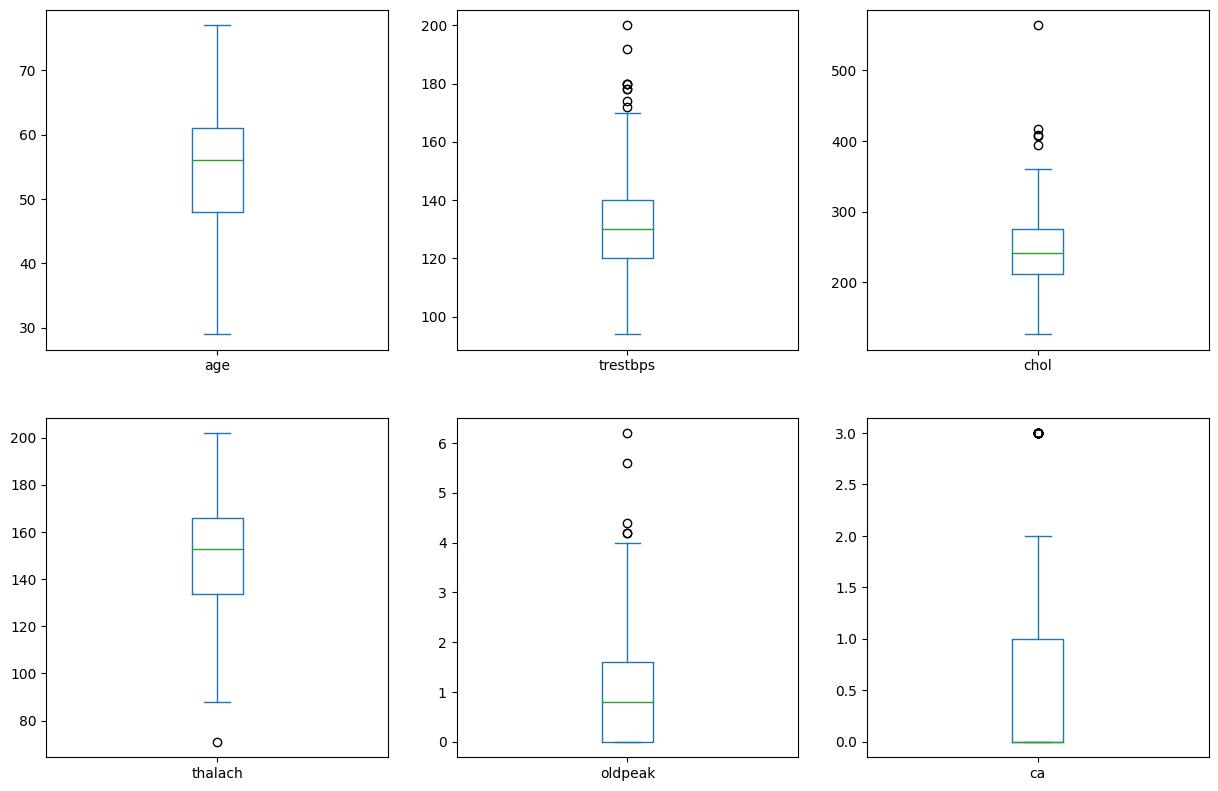

In [18]:
heart_data[num_features].plot(kind="box", figsize = (15, 15),subplots=True, layout=(3,3))

Powyższe wykresy pudełkowe wskazują nam na rozłożenie wartości danych cech. Widzimi, że dane ca, oldepeak są w mniejszym zakresie niż np. wiek. Takie dane o małych zakresach mogą zostać przykryte w niektórych modelach przez cechy o większych zakresach. Warto też przyjrzeć się danym odbiegającym od kwartyli cechy (można rozważyć ich usunięcie). 

<h2>Przygotowanie macierzy cech liczbowych</h2>

In [19]:
df: pd.DataFrame = heart_data[["age", "trestbps", "chol", "thalach", "oldpeak", "ca", "num"]] # dataframe of numeric features

In [20]:
# repearing of the inbalnace in classification and removing null values
df["num"] = df["num"].replace([2, 3, 4], 1) #change classes to binary classification
print(df["num"].value_counts())

#get null values of ca and remove them
null_idx = df[heart_data["ca"].isnull()].index 
print(null_idx)
df = df.drop(null_idx)
df = df.reset_index(drop=True) 
print(df["num"].value_counts())

# balance classes to same amount 138
random_idx = df.query("num == 0").sample(df["num"].value_counts()[0] - df["num"].value_counts()[1]).index 
df = df.drop(random_idx)
df = df.reset_index(drop=True)
print(df["num"].value_counts())

num
0    164
1    139
Name: count, dtype: int64
Index([166, 192, 287, 302], dtype='int64')
num
0    161
1    138
Name: count, dtype: int64
num
0    138
1    138
Name: count, dtype: int64


/var/folders/mh/bbwr87kx54j1nws7g0r4tlg80000gn/T/ipykernel_42182/4231589952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num"] = df["num"].replace([2, 3, 4], 1) #change classes to binary classification


Zdecydowałem na naprawę braku zbalansowania próbek poprzez zmniejszenie klasifikacji do klasyfikacji binarnej (0 - zdrowy, 1 - choroba serca), ponieważ klasy 1-4 oznaczały inne stopnie problemów z sercem, które można na potrzeby modelu budowanego zmniejszyć do tej samej klasyfikacji. Owe rozwiązanie pozwoliło także na zmniejszenie ilości danych potrzebnych do usunięcia, aby klasyfikacje były zbilansowane. 

In [21]:
df.mean()

age          54.510870
trestbps    131.684783
chol        248.670290
thalach     148.746377
oldpeak       1.063406
ca            0.717391
num           0.500000
dtype: float64

In [22]:
df.std()

age          9.105636
trestbps    18.068111
chol        51.827581
thalach     22.773689
oldpeak      1.188827
ca           0.953380
num          0.500908
dtype: float64

Poniżej znajduje się kod ustandaryzujący wartości cech, aby zakresy ich były podobne. Standaryzacja w porównaniu do normalizacji pozostawia rozkład normalny dla cech, które je posiadały.

<Axes: >

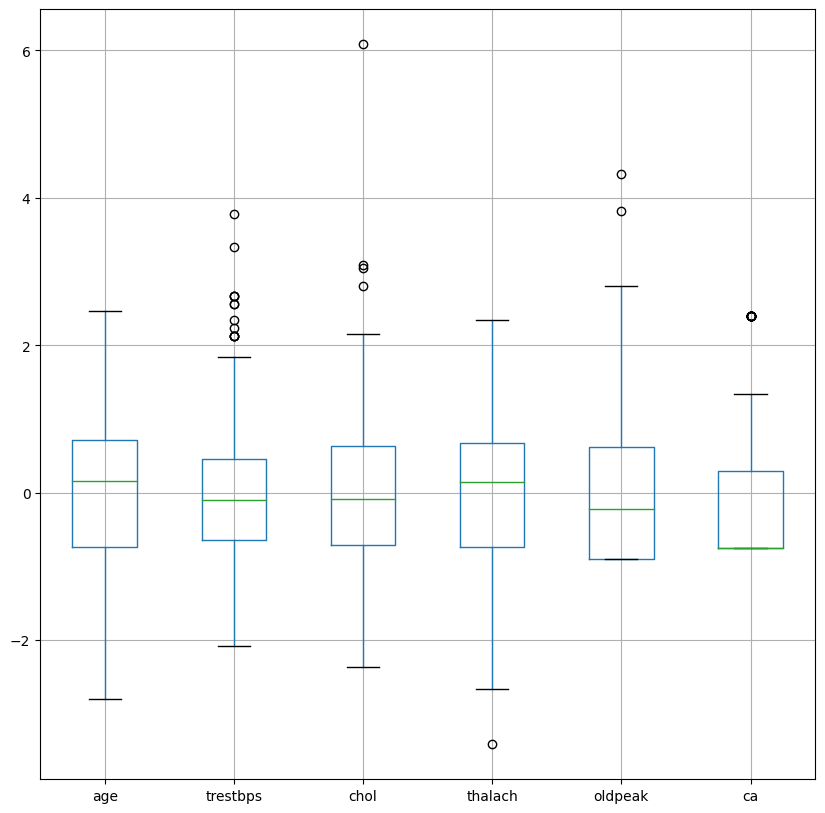

In [23]:
df_without_num = df.loc[:, df.columns != "num"]
std_features = (df_without_num - df_without_num.mean() )/ df_without_num.std() #(value-mean)/variance
std_features.boxplot(figsize=(10,10))

In [24]:
std_features.isnull().sum() #no null values

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
ca          0
dtype: int64

In [25]:
result = std_features
result["heart_disease"] = df["num"]
result.shape 

(276, 7)

In [26]:
result #finished matrix of numerical features

,age,trestbps,chol,thalach,oldpeak,ca,heart_disease
0,0.932294,0.736946,-0.302354,0.055047,1.040180,-0.752472,0
1,1.371582,1.567138,0.720267,-1.789187,0.367248,2.394228,1
2,1.371582,-0.646707,-0.379533,-0.867070,1.292529,1.345328,1
3,-1.923080,-0.093246,0.025656,1.679729,2.049578,-0.752472,0
4,-1.483792,-0.093246,-0.861902,1.021074,0.283131,-0.752472,0
...,...,...,...,...,...,...,...
271,0.273362,0.460215,-0.147996,-1.130532,-0.726267,-0.752472,1
272,-1.044504,-1.200169,0.295783,-0.735339,0.114898,-0.752472,1
273,1.481405,0.681600,-1.074144,-0.340146,1.965461,1.345328,1
274,0.273362,-0.093246,-2.270418,-1.481814,0.114898,0.296428,1


<p><i>Wykonane przez Szymona Sawczuka nr indeksu 260287</i></p>